In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

14

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1129
number of class2:488

 ****** Running generation 0 ****** 

Population's average fitness: 0.47730 stdev: 0.15417
Best fitness: 0.74212 - size: (2, 13) - species 6 - id 59
Average adjusted fitness: 0.271
Mean genetic distance 2.910, standard deviation 0.507
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 7.718 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55596 stdev: 0.15294
Best fitness: 0.75015 - size: (2, 12) - species 7 - id 257
Average adjusted fitness: 0.366
Mean genetic distance 3.079, standard deviation 0.527
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.753 sec (7.735 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59454 stdev: 0.13807
Best fitness: 0.81200 - size: (3, 16) - species 7 - id 539
Average adjusted fitness: 0.332
Mean genetic distance 3.093, standard deviation 0.525
Population of 201 members in 32 species
Total extinctio

Population's average fitness: 0.68626 stdev: 0.14755
Best fitness: 0.85467 - size: (10, 29) - species 37 - id 2293
Average adjusted fitness: 0.481
Mean genetic distance 3.257, standard deviation 0.506
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 9.112 sec (8.742 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.68368 stdev: 0.14354
Best fitness: 0.85467 - size: (10, 29) - species 37 - id 2293
Average adjusted fitness: 0.373
Mean genetic distance 3.247, standard deviation 0.506
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 8.971 sec (8.738 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67598 stdev: 0.15546
Best fitness: 0.85467 - size: (10, 29) - species 37 - id 2293
Average adjusted fitness: 0.413
Mean genetic distance 3.261, standard deviation 0.518
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 9.142 sec (8.755 average)

 ***

Population's average fitness: 0.61674 stdev: 0.07335
Best fitness: 0.73840 - size: (4, 17) - species 41 - id 1866
Average adjusted fitness: 0.218
Mean genetic distance 3.268, standard deviation 0.494
Population of 195 members in 46 species
Total extinctions: 0
Generation time: 7.683 sec (7.754 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61609 stdev: 0.07897
Best fitness: 0.73840 - size: (4, 17) - species 41 - id 1866
Average adjusted fitness: 0.219
Mean genetic distance 3.265, standard deviation 0.483
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 7.904 sec (7.788 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61420 stdev: 0.08196
Best fitness: 0.73840 - size: (4, 17) - species 41 - id 1866
Average adjusted fitness: 0.257
Mean genetic distance 3.278, standard deviation 0.489
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 7.989 sec (7.782 average)

 ******

Population's average fitness: 0.59560 stdev: 0.09317
Best fitness: 0.79097 - size: (5, 20) - species 6 - id 969
Average adjusted fitness: 0.244
Mean genetic distance 3.203, standard deviation 0.479
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 9.684 sec (7.570 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61364 stdev: 0.08924
Best fitness: 0.79097 - size: (5, 20) - species 6 - id 969
Average adjusted fitness: 0.203
Mean genetic distance 3.195, standard deviation 0.488
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.876 sec (7.609 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60179 stdev: 0.09920
Best fitness: 0.79097 - size: (5, 20) - species 6 - id 969
Average adjusted fitness: 0.242
Mean genetic distance 3.181, standard deviation 0.481
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.996 sec (7.652 average)

 ****** Running

Population's average fitness: 0.65657 stdev: 0.10253
Best fitness: 0.82931 - size: (8, 22) - species 14 - id 3931
Average adjusted fitness: 0.287
Mean genetic distance 3.206, standard deviation 0.552
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 9.961 sec (9.446 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.65059 stdev: 0.10393
Best fitness: 0.82931 - size: (8, 22) - species 14 - id 3931
Average adjusted fitness: 0.326
Mean genetic distance 3.245, standard deviation 0.555
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 9.465 sec (9.456 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65015 stdev: 0.10802
Best fitness: 0.82931 - size: (8, 22) - species 14 - id 3931
Average adjusted fitness: 0.277
Mean genetic distance 3.271, standard deviation 0.569
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 9.655 sec (9.523 average)
number o

Population's average fitness: 0.60216 stdev: 0.06825
Best fitness: 0.73222 - size: (5, 20) - species 39 - id 1974
Average adjusted fitness: 0.201
Mean genetic distance 3.182, standard deviation 0.502
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 8.650 sec (8.610 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.60066 stdev: 0.06958
Best fitness: 0.73222 - size: (5, 20) - species 39 - id 1974
Average adjusted fitness: 0.203
Mean genetic distance 3.180, standard deviation 0.510
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 8.597 sec (8.645 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.59989 stdev: 0.07613
Best fitness: 0.73222 - size: (5, 20) - species 39 - id 1974
Average adjusted fitness: 0.193
Mean genetic distance 3.176, standard deviation 0.509
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 9.096 sec (8.692 average)

 ******

Population's average fitness: 0.62316 stdev: 0.11311
Best fitness: 0.81880 - size: (7, 21) - species 28 - id 1882
Average adjusted fitness: 0.294
Mean genetic distance 3.164, standard deviation 0.500
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 8.329 sec (8.057 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63351 stdev: 0.11155
Best fitness: 0.81880 - size: (7, 21) - species 28 - id 1882
Average adjusted fitness: 0.375
Mean genetic distance 3.180, standard deviation 0.502
Population of 193 members in 41 species
Total extinctions: 0
Generation time: 8.130 sec (8.150 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63803 stdev: 0.10939
Best fitness: 0.81880 - size: (7, 21) - species 28 - id 1882
Average adjusted fitness: 0.266
Mean genetic distance 3.182, standard deviation 0.499
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 7.899 sec (8.199 average)

 ******

Population's average fitness: 0.61652 stdev: 0.13466
Best fitness: 0.85838 - size: (3, 15) - species 2 - id 543
Average adjusted fitness: 0.353
Mean genetic distance 2.984, standard deviation 0.481
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.029 sec (6.671 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63905 stdev: 0.13416
Best fitness: 0.85838 - size: (3, 15) - species 2 - id 543
Average adjusted fitness: 0.336
Mean genetic distance 3.012, standard deviation 0.483
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 7.281 sec (6.793 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63200 stdev: 0.13715
Best fitness: 0.85838 - size: (3, 15) - species 2 - id 543
Average adjusted fitness: 0.358
Mean genetic distance 3.094, standard deviation 0.499
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 7.468 sec (6.905 average)

 ****** Running

Population's average fitness: 0.65675 stdev: 0.16170
Best fitness: 0.87941 - size: (3, 15) - species 2 - id 1231
Average adjusted fitness: 0.349
Mean genetic distance 3.272, standard deviation 0.558
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 8.979 sec (8.556 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.68122 stdev: 0.13985
Best fitness: 0.87941 - size: (3, 15) - species 2 - id 1231
Average adjusted fitness: 0.434
Mean genetic distance 3.275, standard deviation 0.550
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 9.566 sec (8.666 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64873 stdev: 0.15829
Best fitness: 0.87941 - size: (3, 15) - species 2 - id 1231
Average adjusted fitness: 0.350
Mean genetic distance 3.261, standard deviation 0.586
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 9.187 sec (8.751 average)

 ****** Ru

Population's average fitness: 0.66133 stdev: 0.10850
Best fitness: 0.78046 - size: (5, 22) - species 42 - id 2203
Average adjusted fitness: 0.352
Mean genetic distance 3.230, standard deviation 0.485
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 8.719 sec (8.594 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65373 stdev: 0.11851
Best fitness: 0.78046 - size: (5, 22) - species 42 - id 2203
Average adjusted fitness: 0.348
Mean genetic distance 3.255, standard deviation 0.478
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 8.656 sec (8.661 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66460 stdev: 0.10338
Best fitness: 0.78046 - size: (5, 22) - species 42 - id 2203
Average adjusted fitness: 0.354
Mean genetic distance 3.239, standard deviation 0.477
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 8.958 sec (8.760 average)

 ******

Population's average fitness: 0.65976 stdev: 0.11928
Best fitness: 0.89301 - size: (6, 23) - species 14 - id 1164
Average adjusted fitness: 0.423
Mean genetic distance 3.191, standard deviation 0.485
Population of 195 members in 45 species
Total extinctions: 0
Generation time: 7.940 sec (7.381 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66021 stdev: 0.11667
Best fitness: 0.89301 - size: (6, 23) - species 14 - id 1164
Average adjusted fitness: 0.371
Mean genetic distance 3.172, standard deviation 0.481
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 8.117 sec (7.577 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67024 stdev: 0.11836
Best fitness: 0.89301 - size: (6, 23) - species 14 - id 1164
Average adjusted fitness: 0.369
Mean genetic distance 3.178, standard deviation 0.483
Population of 195 members in 45 species
Total extinctions: 0
Generation time: 8.135 sec (7.727 average)

 ******

Population's average fitness: 0.49742 stdev: 0.06236
Best fitness: 0.72356 - size: (2, 13) - species 1 - id 31
Average adjusted fitness: 0.195
Mean genetic distance 2.827, standard deviation 0.442
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 6.211 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54439 stdev: 0.06754
Best fitness: 0.72356 - size: (2, 13) - species 5 - id 31
Average adjusted fitness: 0.197
Mean genetic distance 2.911, standard deviation 0.453
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 6.610 sec (6.411 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55545 stdev: 0.07414
Best fitness: 0.75572 - size: (3, 15) - species 18 - id 512
Average adjusted fitness: 0.200
Mean genetic distance 2.912, standard deviation 0.469
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 6.948 sec (6.590 average)

 ****** Running generation 3 ***

Population's average fitness: 0.65270 stdev: 0.09564
Best fitness: 0.80210 - size: (3, 14) - species 36 - id 2287
Average adjusted fitness: 0.187
Mean genetic distance 3.223, standard deviation 0.526
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 9.080 sec (9.347 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65593 stdev: 0.09786
Best fitness: 0.80210 - size: (3, 14) - species 36 - id 2287
Average adjusted fitness: 0.295
Mean genetic distance 3.228, standard deviation 0.524
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 9.140 sec (9.388 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64912 stdev: 0.10515
Best fitness: 0.80210 - size: (3, 14) - species 36 - id 2287
Average adjusted fitness: 0.295
Mean genetic distance 3.220, standard deviation 0.527
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 9.366 sec (9.404 average)

 ******

Population's average fitness: 0.65679 stdev: 0.11337
Best fitness: 0.78231 - size: (6, 19) - species 26 - id 1659
Average adjusted fitness: 0.350
Mean genetic distance 3.193, standard deviation 0.460
Population of 200 members in 47 species
Total extinctions: 0
Generation time: 8.776 sec (8.487 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64643 stdev: 0.12575
Best fitness: 0.78231 - size: (6, 19) - species 26 - id 1659
Average adjusted fitness: 0.345
Mean genetic distance 3.189, standard deviation 0.468
Population of 199 members in 46 species
Total extinctions: 0
Generation time: 8.584 sec (8.507 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65944 stdev: 0.11091
Best fitness: 0.78231 - size: (6, 19) - species 26 - id 1659
Average adjusted fitness: 0.362
Mean genetic distance 3.199, standard deviation 0.473
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 8.625 sec (8.551 average)

 ******

Population's average fitness: 0.57589 stdev: 0.09762
Best fitness: 0.74026 - size: (3, 15) - species 24 - id 551
Average adjusted fitness: 0.257
Mean genetic distance 3.138, standard deviation 0.475
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 8.086 sec (7.107 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58198 stdev: 0.10133
Best fitness: 0.74768 - size: (5, 19) - species 9 - id 1249
Average adjusted fitness: 0.261
Mean genetic distance 3.125, standard deviation 0.485
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.924 sec (7.209 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58892 stdev: 0.10126
Best fitness: 0.74768 - size: (5, 19) - species 9 - id 1249
Average adjusted fitness: 0.260
Mean genetic distance 3.130, standard deviation 0.491
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 7.773 sec (7.272 average)

 ****** Runn

Population's average fitness: 0.62062 stdev: 0.11189
Best fitness: 0.79035 - size: (7, 22) - species 22 - id 3674
Average adjusted fitness: 0.269
Mean genetic distance 3.314, standard deviation 0.479
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 9.455 sec (9.109 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63780 stdev: 0.09918
Best fitness: 0.79097 - size: (9, 27) - species 22 - id 4205
Average adjusted fitness: 0.285
Mean genetic distance 3.304, standard deviation 0.491
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 9.652 sec (9.225 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.61659 stdev: 0.11346
Best fitness: 0.79097 - size: (9, 27) - species 22 - id 4205
Average adjusted fitness: 0.297
Mean genetic distance 3.300, standard deviation 0.494
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 9.585 sec (9.286 average)
number o

Population's average fitness: 0.61824 stdev: 0.08454
Best fitness: 0.74335 - size: (5, 18) - species 27 - id 1331
Average adjusted fitness: 0.254
Mean genetic distance 3.242, standard deviation 0.481
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 9.219 sec (8.497 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61656 stdev: 0.08763
Best fitness: 0.74459 - size: (10, 28) - species 16 - id 2871
Average adjusted fitness: 0.300
Mean genetic distance 3.209, standard deviation 0.482
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 8.969 sec (8.617 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62620 stdev: 0.07266
Best fitness: 0.74459 - size: (10, 28) - species 1 - id 2871
Average adjusted fitness: 0.229
Mean genetic distance 3.208, standard deviation 0.488
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 9.002 sec (8.716 average)

 *****

Population's average fitness: 0.62207 stdev: 0.14273
Best fitness: 0.80210 - size: (5, 21) - species 29 - id 950
Average adjusted fitness: 0.333
Mean genetic distance 3.177, standard deviation 0.513
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 8.247 sec (7.942 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64767 stdev: 0.11924
Best fitness: 0.80210 - size: (5, 21) - species 29 - id 950
Average adjusted fitness: 0.341
Mean genetic distance 3.186, standard deviation 0.512
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 8.638 sec (8.053 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64542 stdev: 0.12418
Best fitness: 0.80210 - size: (5, 21) - species 29 - id 950
Average adjusted fitness: 0.346
Mean genetic distance 3.153, standard deviation 0.514
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 8.321 sec (8.110 average)

 ****** Ru

Population's average fitness: 0.63217 stdev: 0.12601
Best fitness: 0.84106 - size: (3, 15) - species 16 - id 333
Average adjusted fitness: 0.336
Mean genetic distance 3.041, standard deviation 0.481
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.025 sec (6.787 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62544 stdev: 0.14010
Best fitness: 0.84106 - size: (3, 15) - species 16 - id 333
Average adjusted fitness: 0.330
Mean genetic distance 3.037, standard deviation 0.473
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.261 sec (6.882 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63011 stdev: 0.13920
Best fitness: 0.84106 - size: (3, 15) - species 16 - id 333
Average adjusted fitness: 0.433
Mean genetic distance 3.085, standard deviation 0.460
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 7.701 sec (7.018 average)

 ****** Runn

Population's average fitness: 0.67368 stdev: 0.14888
Best fitness: 0.86333 - size: (8, 25) - species 8 - id 3099
Average adjusted fitness: 0.375
Mean genetic distance 3.216, standard deviation 0.496
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.996 sec (8.592 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66989 stdev: 0.15688
Best fitness: 0.86333 - size: (8, 25) - species 8 - id 3099
Average adjusted fitness: 0.382
Mean genetic distance 3.216, standard deviation 0.512
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 8.847 sec (8.664 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.69067 stdev: 0.14474
Best fitness: 0.86333 - size: (8, 25) - species 8 - id 3099
Average adjusted fitness: 0.411
Mean genetic distance 3.198, standard deviation 0.509
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 8.914 sec (8.742 average)

 ****** Ru

Population's average fitness: 0.58624 stdev: 0.06275
Best fitness: 0.71119 - size: (9, 27) - species 23 - id 2533
Average adjusted fitness: 0.164
Mean genetic distance 3.163, standard deviation 0.491
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 8.513 sec (8.360 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58472 stdev: 0.06000
Best fitness: 0.71119 - size: (9, 27) - species 23 - id 2533
Average adjusted fitness: 0.185
Mean genetic distance 3.189, standard deviation 0.497
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 8.553 sec (8.427 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.58534 stdev: 0.06251
Best fitness: 0.71119 - size: (9, 27) - species 23 - id 2533
Average adjusted fitness: 0.137
Mean genetic distance 3.206, standard deviation 0.519
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 8.589 sec (8.483 average)

 ******

Population's average fitness: 0.63831 stdev: 0.12894
Best fitness: 0.80952 - size: (5, 20) - species 12 - id 870
Average adjusted fitness: 0.338
Mean genetic distance 3.169, standard deviation 0.494
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 7.981 sec (7.716 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65071 stdev: 0.12124
Best fitness: 0.80952 - size: (5, 20) - species 12 - id 870
Average adjusted fitness: 0.391
Mean genetic distance 3.189, standard deviation 0.483
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 7.975 sec (7.860 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64836 stdev: 0.12997
Best fitness: 0.80952 - size: (5, 20) - species 12 - id 870
Average adjusted fitness: 0.384
Mean genetic distance 3.182, standard deviation 0.472
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 8.072 sec (8.006 average)

 ****** Ru

Population's average fitness: 0.49680 stdev: 0.05444
Best fitness: 0.70810 - size: (2, 13) - species 3 - id 161
Average adjusted fitness: 0.207
Mean genetic distance 2.894, standard deviation 0.511
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 6.306 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52302 stdev: 0.05349
Best fitness: 0.70810 - size: (2, 13) - species 3 - id 161
Average adjusted fitness: 0.130
Mean genetic distance 2.982, standard deviation 0.517
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.640 sec (6.473 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53920 stdev: 0.06305
Best fitness: 0.70810 - size: (2, 13) - species 21 - id 161
Average adjusted fitness: 0.175
Mean genetic distance 2.997, standard deviation 0.508
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 6.948 sec (6.631 average)

 ****** Running generation 3 *

Population's average fitness: 0.61905 stdev: 0.08019
Best fitness: 0.79097 - size: (8, 25) - species 29 - id 2658
Average adjusted fitness: 0.235
Mean genetic distance 3.193, standard deviation 0.506
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 9.079 sec (8.932 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62126 stdev: 0.08071
Best fitness: 0.80829 - size: (9, 29) - species 29 - id 3707
Average adjusted fitness: 0.235
Mean genetic distance 3.238, standard deviation 0.483
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 8.915 sec (8.913 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61124 stdev: 0.08264
Best fitness: 0.80829 - size: (9, 29) - species 29 - id 3707
Average adjusted fitness: 0.170
Mean genetic distance 3.224, standard deviation 0.494
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 9.316 sec (8.945 average)

 ******

Population's average fitness: 0.60856 stdev: 0.08071
Best fitness: 0.77242 - size: (5, 20) - species 2 - id 908
Average adjusted fitness: 0.254
Mean genetic distance 3.135, standard deviation 0.493
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 8.223 sec (8.528 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61089 stdev: 0.07750
Best fitness: 0.77242 - size: (5, 20) - species 2 - id 908
Average adjusted fitness: 0.158
Mean genetic distance 3.159, standard deviation 0.491
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 8.468 sec (8.584 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61749 stdev: 0.07570
Best fitness: 0.77242 - size: (5, 20) - species 2 - id 908
Average adjusted fitness: 0.171
Mean genetic distance 3.168, standard deviation 0.500
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 8.674 sec (8.613 average)

 ****** Runni

Population's average fitness: 0.59241 stdev: 0.08331
Best fitness: 0.73717 - size: (5, 19) - species 21 - id 967
Average adjusted fitness: 0.229
Mean genetic distance 3.077, standard deviation 0.495
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.592 sec (7.049 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59081 stdev: 0.08865
Best fitness: 0.73717 - size: (5, 19) - species 21 - id 967
Average adjusted fitness: 0.224
Mean genetic distance 3.106, standard deviation 0.496
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.561 sec (7.113 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59713 stdev: 0.08138
Best fitness: 0.73717 - size: (5, 19) - species 21 - id 967
Average adjusted fitness: 0.237
Mean genetic distance 3.120, standard deviation 0.508
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 7.998 sec (7.211 average)

 ****** Runn

Population's average fitness: 0.63009 stdev: 0.09679
Best fitness: 0.78108 - size: (7, 21) - species 4 - id 2422
Average adjusted fitness: 0.232
Mean genetic distance 3.274, standard deviation 0.529
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 8.981 sec (8.779 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.61625 stdev: 0.10711
Best fitness: 0.79839 - size: (7, 22) - species 4 - id 4535
Average adjusted fitness: 0.259
Mean genetic distance 3.256, standard deviation 0.553
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 9.129 sec (8.831 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.61352 stdev: 0.10821
Best fitness: 0.79839 - size: (7, 22) - species 4 - id 4535
Average adjusted fitness: 0.245
Mean genetic distance 3.254, standard deviation 0.548
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 9.352 sec (8.915 average)
number of c

Population's average fitness: 0.60576 stdev: 0.08423
Best fitness: 0.74892 - size: (4, 17) - species 4 - id 3193
Average adjusted fitness: 0.221
Mean genetic distance 3.174, standard deviation 0.506
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.075 sec (8.795 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61356 stdev: 0.08240
Best fitness: 0.75448 - size: (2, 13) - species 2 - id 3326
Average adjusted fitness: 0.181
Mean genetic distance 3.211, standard deviation 0.495
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 8.094 sec (8.738 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61124 stdev: 0.08447
Best fitness: 0.75448 - size: (2, 13) - species 2 - id 3326
Average adjusted fitness: 0.240
Mean genetic distance 3.205, standard deviation 0.509
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 8.203 sec (8.671 average)

 ****** Ru

Population's average fitness: 0.68540 stdev: 0.10880
Best fitness: 0.83550 - size: (6, 20) - species 2 - id 1677
Average adjusted fitness: 0.382
Mean genetic distance 3.110, standard deviation 0.504
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 7.630 sec (8.175 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67836 stdev: 0.11562
Best fitness: 0.83550 - size: (6, 20) - species 2 - id 1677
Average adjusted fitness: 0.437
Mean genetic distance 3.119, standard deviation 0.522
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.694 sec (8.279 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68948 stdev: 0.10428
Best fitness: 0.83550 - size: (6, 20) - species 2 - id 1677
Average adjusted fitness: 0.392
Mean genetic distance 3.113, standard deviation 0.516
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 7.621 sec (8.361 average)

 ****** Ru

Population's average fitness: 0.54897 stdev: 0.05859
Best fitness: 0.71490 - size: (3, 15) - species 4 - id 839
Average adjusted fitness: 0.164
Mean genetic distance 2.973, standard deviation 0.494
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 7.209 sec (6.413 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55676 stdev: 0.05867
Best fitness: 0.71490 - size: (3, 15) - species 4 - id 839
Average adjusted fitness: 0.154
Mean genetic distance 2.971, standard deviation 0.491
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 7.040 sec (6.518 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56683 stdev: 0.05856
Best fitness: 0.71490 - size: (3, 15) - species 4 - id 839
Average adjusted fitness: 0.122
Mean genetic distance 2.958, standard deviation 0.498
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 7.015 sec (6.589 average)

 ****** Running

Population's average fitness: 0.61046 stdev: 0.07920
Best fitness: 0.75758 - size: (5, 22) - species 9 - id 3883
Average adjusted fitness: 0.202
Mean genetic distance 3.189, standard deviation 0.501
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 7.948 sec (8.219 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61078 stdev: 0.08203
Best fitness: 0.75881 - size: (6, 24) - species 9 - id 4315
Average adjusted fitness: 0.146
Mean genetic distance 3.191, standard deviation 0.517
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 7.760 sec (8.197 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.61874 stdev: 0.07386
Best fitness: 0.75881 - size: (6, 24) - species 9 - id 4315
Average adjusted fitness: 0.138
Mean genetic distance 3.219, standard deviation 0.522
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 7.897 sec (8.198 average)

 ****** Ru

Population's average fitness: 0.60836 stdev: 0.10812
Best fitness: 0.79963 - size: (3, 14) - species 34 - id 2829
Average adjusted fitness: 0.264
Mean genetic distance 3.191, standard deviation 0.491
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.004 sec (7.789 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61419 stdev: 0.10338
Best fitness: 0.79963 - size: (3, 14) - species 34 - id 2829
Average adjusted fitness: 0.313
Mean genetic distance 3.219, standard deviation 0.507
Population of 190 members in 31 species
Total extinctions: 0
Generation time: 8.587 sec (7.897 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61342 stdev: 0.10333
Best fitness: 0.79963 - size: (3, 14) - species 34 - id 2829
Average adjusted fitness: 0.252
Mean genetic distance 3.216, standard deviation 0.497
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 7.780 sec (7.904 average)

 ******

Population's average fitness: 0.61692 stdev: 0.09944
Best fitness: 0.83550 - size: (5, 20) - species 14 - id 1661
Average adjusted fitness: 0.228
Mean genetic distance 3.184, standard deviation 0.478
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.627 sec (6.913 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61611 stdev: 0.10168
Best fitness: 0.83550 - size: (5, 20) - species 14 - id 1661
Average adjusted fitness: 0.261
Mean genetic distance 3.218, standard deviation 0.481
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 7.407 sec (7.061 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62253 stdev: 0.10078
Best fitness: 0.83550 - size: (5, 20) - species 14 - id 1661
Average adjusted fitness: 0.238
Mean genetic distance 3.230, standard deviation 0.469
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.645 sec (7.186 average)

 ******

Population's average fitness: 0.60483 stdev: 0.20865
Best fitness: 0.84601 - size: (2, 13) - species 9 - id 67
Average adjusted fitness: 0.453
Mean genetic distance 3.047, standard deviation 0.499
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.048 sec (5.935 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63724 stdev: 0.20124
Best fitness: 0.84601 - size: (2, 13) - species 9 - id 67
Average adjusted fitness: 0.417
Mean genetic distance 3.077, standard deviation 0.497
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.411 sec (6.094 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.70846 stdev: 0.16243
Best fitness: 0.90414 - size: (3, 15) - species 35 - id 680
Average adjusted fitness: 0.487
Mean genetic distance 3.067, standard deviation 0.490
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.741 sec (6.255 average)

 ****** Running 

Mean genetic distance 3.265, standard deviation 0.520
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.548 sec (7.446 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.71396 stdev: 0.20225
Best fitness: 0.92146 - size: (4, 14) - species 47 - id 3025
Average adjusted fitness: 0.542
Mean genetic distance 3.269, standard deviation 0.515
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 8.020 sec (7.530 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.73775 stdev: 0.17799
Best fitness: 0.92146 - size: (4, 14) - species 47 - id 3025
Average adjusted fitness: 0.548
Mean genetic distance 3.272, standard deviation 0.505
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.926 sec (7.585 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.72588 stdev: 0.19057
Best fitness: 0.92146 - size: (4, 14) - species 47 - id 3025


Total extinctions: 0
Generation time: 7.699 sec (7.451 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62528 stdev: 0.08254
Best fitness: 0.75201 - size: (8, 24) - species 19 - id 2041
Average adjusted fitness: 0.290
Mean genetic distance 3.121, standard deviation 0.468
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.617 sec (7.521 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63105 stdev: 0.08015
Best fitness: 0.75201 - size: (8, 24) - species 19 - id 2041
Average adjusted fitness: 0.245
Mean genetic distance 3.142, standard deviation 0.471
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.826 sec (7.585 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63636 stdev: 0.08154
Best fitness: 0.75201 - size: (8, 24) - species 19 - id 2041
Average adjusted fitness: 0.326
Mean genetic distance 3.128, standard deviation 0.473
Populati

Population's average fitness: 0.63006 stdev: 0.11015
Best fitness: 0.82437 - size: (6, 19) - species 10 - id 1117
Average adjusted fitness: 0.281
Mean genetic distance 3.207, standard deviation 0.488
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.580 sec (6.863 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64581 stdev: 0.10763
Best fitness: 0.82437 - size: (6, 19) - species 10 - id 1117
Average adjusted fitness: 0.272
Mean genetic distance 3.198, standard deviation 0.502
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.324 sec (6.909 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64478 stdev: 0.11298
Best fitness: 0.82437 - size: (6, 19) - species 10 - id 1117
Average adjusted fitness: 0.248
Mean genetic distance 3.199, standard deviation 0.487
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 7.395 sec (7.096 average)

 ****** 

Population's average fitness: 0.68515 stdev: 0.11914
Best fitness: 0.83055 - size: (8, 22) - species 10 - id 4615
Average adjusted fitness: 0.377
Mean genetic distance 3.215, standard deviation 0.524
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 8.656 sec (8.570 average)
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.50065 stdev: 0.05726
Best fitness: 0.72480 - size: (2, 13) - species 2 - id 152
Average adjusted fitness: 0.142
Mean genetic distance 2.914, standard deviation 0.474
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.559 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53514 stdev: 0.06361
Best fitness: 0.72480 - size: (2, 13) - species 4 - id 152
Average adjusted fitness: 0.215
Mean genetic distance 3.028, standard deviation 0.480
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 6.099 sec (5.8

Population's average fitness: 0.62339 stdev: 0.09192
Best fitness: 0.79159 - size: (8, 24) - species 30 - id 3141
Average adjusted fitness: 0.185
Mean genetic distance 3.284, standard deviation 0.527
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 8.388 sec (8.140 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62999 stdev: 0.09131
Best fitness: 0.79159 - size: (8, 24) - species 30 - id 3141
Average adjusted fitness: 0.191
Mean genetic distance 3.281, standard deviation 0.532
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 8.425 sec (8.177 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61670 stdev: 0.08843
Best fitness: 0.79159 - size: (8, 24) - species 30 - id 3141
Average adjusted fitness: 0.186
Mean genetic distance 3.293, standard deviation 0.534
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.197 sec (8.183 average)

 ******

Population's average fitness: 0.61388 stdev: 0.09920
Best fitness: 0.76994 - size: (5, 19) - species 30 - id 1089
Average adjusted fitness: 0.230
Mean genetic distance 3.177, standard deviation 0.464
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 7.131 sec (7.061 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61472 stdev: 0.10046
Best fitness: 0.76994 - size: (5, 19) - species 30 - id 1089
Average adjusted fitness: 0.232
Mean genetic distance 3.206, standard deviation 0.475
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.281 sec (7.092 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61338 stdev: 0.10003
Best fitness: 0.76994 - size: (5, 19) - species 30 - id 1089
Average adjusted fitness: 0.234
Mean genetic distance 3.237, standard deviation 0.480
Population of 191 members in 39 species
Total extinctions: 0
Generation time: 7.330 sec (7.141 average)

 ******

Population's average fitness: 0.58411 stdev: 0.07114
Best fitness: 0.71367 - size: (4, 15) - species 21 - id 531
Average adjusted fitness: 0.152
Mean genetic distance 3.117, standard deviation 0.479
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 6.854 sec (6.397 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59019 stdev: 0.07219
Best fitness: 0.75201 - size: (5, 16) - species 21 - id 1045
Average adjusted fitness: 0.161
Mean genetic distance 3.147, standard deviation 0.489
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.560 sec (6.420 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59007 stdev: 0.07703
Best fitness: 0.75201 - size: (5, 16) - species 21 - id 1045
Average adjusted fitness: 0.241
Mean genetic distance 3.164, standard deviation 0.478
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 7.145 sec (6.511 average)

 ****** Ru

Population's average fitness: 0.61991 stdev: 0.08605
Best fitness: 0.77922 - size: (5, 21) - species 10 - id 3630
Average adjusted fitness: 0.234
Mean genetic distance 3.280, standard deviation 0.499
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 7.950 sec (7.932 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.63055 stdev: 0.08611
Best fitness: 0.77922 - size: (5, 21) - species 10 - id 3630
Average adjusted fitness: 0.241
Mean genetic distance 3.302, standard deviation 0.499
Population of 190 members in 29 species
Total extinctions: 0
Generation time: 8.052 sec (7.942 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62458 stdev: 0.08823
Best fitness: 0.77922 - size: (5, 21) - species 10 - id 3630
Average adjusted fitness: 0.252
Mean genetic distance 3.302, standard deviation 0.497
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.009 sec (7.935 average)

 ******

Population's average fitness: 0.64425 stdev: 0.09383
Best fitness: 0.80643 - size: (3, 16) - species 2 - id 1086
Average adjusted fitness: 0.211
Mean genetic distance 3.218, standard deviation 0.487
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.193 sec (7.726 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.65276 stdev: 0.09028
Best fitness: 0.80643 - size: (3, 16) - species 2 - id 1086
Average adjusted fitness: 0.202
Mean genetic distance 3.213, standard deviation 0.477
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 8.175 sec (7.786 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64784 stdev: 0.09793
Best fitness: 0.80643 - size: (3, 16) - species 2 - id 1086
Average adjusted fitness: 0.243
Mean genetic distance 3.236, standard deviation 0.487
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 8.152 sec (7.848 average)

 ****** Ru

Population's average fitness: 0.69223 stdev: 0.13719
Best fitness: 0.87199 - size: (5, 22) - species 3 - id 1548
Average adjusted fitness: 0.430
Mean genetic distance 3.281, standard deviation 0.471
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 7.903 sec (7.355 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.69536 stdev: 0.14385
Best fitness: 0.87199 - size: (5, 22) - species 3 - id 1548
Average adjusted fitness: 0.387
Mean genetic distance 3.266, standard deviation 0.468
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.711 sec (7.438 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69401 stdev: 0.14740
Best fitness: 0.87199 - size: (5, 22) - species 3 - id 1548
Average adjusted fitness: 0.530
Mean genetic distance 3.268, standard deviation 0.471
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 7.808 sec (7.549 average)

 ****** Ru

Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.259 sec (5.954 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62362 stdev: 0.12960
Best fitness: 0.83302 - size: (4, 17) - species 32 - id 591
Average adjusted fitness: 0.330
Mean genetic distance 3.071, standard deviation 0.481
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.547 sec (6.102 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61326 stdev: 0.13637
Best fitness: 0.83302 - size: (4, 17) - species 32 - id 591
Average adjusted fitness: 0.300
Mean genetic distance 3.091, standard deviation 0.482
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.686 sec (6.219 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62392 stdev: 0.13791
Best fitness: 0.83302 - size: (4, 17) - species 2 - id 591
Average adjusted fitness: 0.303
Mean genetic distance 3.125, 

Population's average fitness: 0.66516 stdev: 0.14186
Best fitness: 0.84787 - size: (8, 28) - species 16 - id 3805
Average adjusted fitness: 0.437
Mean genetic distance 3.311, standard deviation 0.506
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 8.363 sec (7.973 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.67605 stdev: 0.12812
Best fitness: 0.84787 - size: (8, 28) - species 16 - id 3805
Average adjusted fitness: 0.394
Mean genetic distance 3.303, standard deviation 0.508
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.832 sec (8.085 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65657 stdev: 0.14228
Best fitness: 0.84787 - size: (8, 28) - species 16 - id 3805
Average adjusted fitness: 0.352
Mean genetic distance 3.289, standard deviation 0.511
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 10.611 sec (8.365 average)

 *****

Population's average fitness: 0.69679 stdev: 0.11791
Best fitness: 0.87693 - size: (4, 17) - species 28 - id 682
Average adjusted fitness: 0.341
Mean genetic distance 3.223, standard deviation 0.475
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 7.913 sec (7.933 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.69838 stdev: 0.11478
Best fitness: 0.87879 - size: (5, 18) - species 34 - id 2856
Average adjusted fitness: 0.392
Mean genetic distance 3.224, standard deviation 0.489
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.827 sec (7.959 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.69881 stdev: 0.11914
Best fitness: 0.87879 - size: (5, 18) - species 34 - id 2856
Average adjusted fitness: 0.350
Mean genetic distance 3.232, standard deviation 0.485
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 9.033 sec (8.089 average)

 ****** 

Population's average fitness: 0.64012 stdev: 0.11237
Best fitness: 0.81509 - size: (5, 19) - species 23 - id 1418
Average adjusted fitness: 0.282
Mean genetic distance 3.224, standard deviation 0.478
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 7.532 sec (6.968 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64216 stdev: 0.11569
Best fitness: 0.84601 - size: (6, 21) - species 23 - id 1527
Average adjusted fitness: 0.264
Mean genetic distance 3.206, standard deviation 0.472
Population of 212 members in 46 species
Total extinctions: 0
Generation time: 7.475 sec (7.152 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63965 stdev: 0.12068
Best fitness: 0.84601 - size: (6, 21) - species 23 - id 1527
Average adjusted fitness: 0.369
Mean genetic distance 3.229, standard deviation 0.477
Population of 199 members in 47 species
Total extinctions: 0
Generation time: 8.204 sec (7.344 average)

 ******

Population's average fitness: 0.42509 stdev: 0.27491
Best fitness: 0.91528 - size: (2, 13) - species 1 - id 161
Average adjusted fitness: 0.338
Mean genetic distance 2.897, standard deviation 0.460
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 5.729 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61066 stdev: 0.28637
Best fitness: 0.93568 - size: (2, 14) - species 8 - id 314
Average adjusted fitness: 0.523
Mean genetic distance 2.968, standard deviation 0.455
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 6.398 sec (6.063 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71474 stdev: 0.24136
Best fitness: 0.94001 - size: (3, 15) - species 13 - id 469
Average adjusted fitness: 0.572
Mean genetic distance 3.022, standard deviation 0.449
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 6.375 sec (6.167 average)

 ****** Running generation 3 *

Total extinctions: 0
Generation time: 7.708 sec (7.543 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.80343 stdev: 0.20128
Best fitness: 0.97155 - size: (6, 21) - species 24 - id 3234
Average adjusted fitness: 0.699
Mean genetic distance 3.190, standard deviation 0.530
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 7.770 sec (7.590 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.78007 stdev: 0.22668
Best fitness: 0.97155 - size: (6, 21) - species 24 - id 3234
Average adjusted fitness: 0.681
Mean genetic distance 3.213, standard deviation 0.543
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 8.207 sec (7.687 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.76559 stdev: 0.25162
Best fitness: 0.97155 - size: (6, 21) - species 24 - id 3234
Average adjusted fitness: 0.671
Mean genetic distance 3.201, standard deviation 0.558
Populati

Mean genetic distance 3.180, standard deviation 0.479
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 7.512 sec (7.176 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71988 stdev: 0.17772
Best fitness: 0.87137 - size: (3, 16) - species 2 - id 2276
Average adjusted fitness: 0.506
Mean genetic distance 3.182, standard deviation 0.456
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 7.381 sec (7.231 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73086 stdev: 0.15970
Best fitness: 0.87137 - size: (3, 16) - species 2 - id 2276
Average adjusted fitness: 0.517
Mean genetic distance 3.196, standard deviation 0.470
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.623 sec (7.309 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.71643 stdev: 0.17409
Best fitness: 0.87137 - size: (3, 15) - species 2 - id 1500
Ave

Mean genetic distance 3.093, standard deviation 0.469
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 7.074 sec (6.603 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58763 stdev: 0.09286
Best fitness: 0.79159 - size: (7, 20) - species 13 - id 920
Average adjusted fitness: 0.233
Mean genetic distance 3.104, standard deviation 0.471
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 7.391 sec (6.701 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59853 stdev: 0.09182
Best fitness: 0.79963 - size: (4, 19) - species 5 - id 1194
Average adjusted fitness: 0.255
Mean genetic distance 3.109, standard deviation 0.474
Population of 208 members in 43 species
Total extinctions: 0
Generation time: 7.420 sec (6.781 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59511 stdev: 0.10925
Best fitness: 0.80643 - size: (5, 21) - species 5 - id 1411
Averag

Mean genetic distance 3.206, standard deviation 0.469
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.131 sec (8.603 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64433 stdev: 0.12281
Best fitness: 0.82870 - size: (7, 23) - species 1 - id 2743
Average adjusted fitness: 0.338
Mean genetic distance 3.203, standard deviation 0.469
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 9.012 sec (8.695 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.66100 stdev: 0.11725
Best fitness: 0.83302 - size: (11, 29) - species 13 - id 4100
Average adjusted fitness: 0.326
Mean genetic distance 3.216, standard deviation 0.476
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 9.128 sec (8.773 average)
number of class1:645
number of class2:972

 ****** Running generation 0 ****** 

Population's average fitness: 0.51168 stdev: 0.09125
Best fitness: 0.7087

Mean genetic distance 3.284, standard deviation 0.498
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 8.027 sec (7.794 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63747 stdev: 0.10435
Best fitness: 0.80767 - size: (5, 16) - species 40 - id 1934
Average adjusted fitness: 0.291
Mean genetic distance 3.296, standard deviation 0.497
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.358 sec (7.884 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63509 stdev: 0.10773
Best fitness: 0.80767 - size: (5, 16) - species 40 - id 1934
Average adjusted fitness: 0.254
Mean genetic distance 3.283, standard deviation 0.508
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 8.416 sec (7.947 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64731 stdev: 0.09747
Best fitness: 0.80767 - size: (5, 16) - species 40 - id 1934


Mean genetic distance 3.222, standard deviation 0.453
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 8.794 sec (7.713 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69141 stdev: 0.11585
Best fitness: 0.88064 - size: (5, 17) - species 8 - id 1445
Average adjusted fitness: 0.287
Mean genetic distance 3.240, standard deviation 0.462
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.819 sec (7.817 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69098 stdev: 0.13265
Best fitness: 0.88126 - size: (6, 19) - species 8 - id 2127
Average adjusted fitness: 0.424
Mean genetic distance 3.227, standard deviation 0.463
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.005 sec (7.883 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66977 stdev: 0.13441
Best fitness: 0.88188 - size: (7, 21) - species 8 - id 2251
Ave

Mean genetic distance 3.077, standard deviation 0.472
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.744 sec (6.337 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59869 stdev: 0.09862
Best fitness: 0.80829 - size: (3, 15) - species 16 - id 816
Average adjusted fitness: 0.261
Mean genetic distance 3.095, standard deviation 0.486
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 7.110 sec (6.492 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60974 stdev: 0.10189
Best fitness: 0.81756 - size: (2, 13) - species 16 - id 962
Average adjusted fitness: 0.262
Mean genetic distance 3.065, standard deviation 0.493
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.964 sec (6.570 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62541 stdev: 0.10124
Best fitness: 0.81756 - size: (2, 13) - species 16 - id 962
Averag

Mean genetic distance 3.218, standard deviation 0.509
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.278 sec (8.280 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66065 stdev: 0.11155
Best fitness: 0.82870 - size: (6, 24) - species 33 - id 2237
Average adjusted fitness: 0.250
Mean genetic distance 3.198, standard deviation 0.524
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 8.459 sec (8.318 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66902 stdev: 0.10667
Best fitness: 0.82870 - size: (6, 24) - species 33 - id 2237
Average adjusted fitness: 0.301
Mean genetic distance 3.181, standard deviation 0.520
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.287 sec (8.382 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.67080 stdev: 0.10962
Best fitness: 0.83488 - size: (8, 24) - species 1 - id 4253
A

Mean genetic distance 3.221, standard deviation 0.482
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 7.860 sec (7.878 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67207 stdev: 0.12898
Best fitness: 0.78912 - size: (5, 20) - species 25 - id 2771
Average adjusted fitness: 0.367
Mean genetic distance 3.202, standard deviation 0.494
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 7.811 sec (7.926 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.68265 stdev: 0.11614
Best fitness: 0.78912 - size: (5, 20) - species 25 - id 2771
Average adjusted fitness: 0.402
Mean genetic distance 3.210, standard deviation 0.484
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 8.005 sec (7.994 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.68506 stdev: 0.11220
Best fitness: 0.78912 - size: (5, 20) - species 25 - id 2771


Total extinctions: 0
Generation time: 7.046 sec (6.485 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60810 stdev: 0.08459
Best fitness: 0.77180 - size: (4, 18) - species 7 - id 1125
Average adjusted fitness: 0.261
Mean genetic distance 3.160, standard deviation 0.508
Population of 190 members in 30 species
Total extinctions: 0
Generation time: 7.352 sec (6.668 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61230 stdev: 0.09124
Best fitness: 0.77242 - size: (9, 27) - species 27 - id 1822
Average adjusted fitness: 0.279
Mean genetic distance 3.147, standard deviation 0.503
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 6.968 sec (6.765 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60603 stdev: 0.09208
Best fitness: 0.77242 - size: (9, 27) - species 27 - id 1822
Average adjusted fitness: 0.187
Mean genetic distance 3.147, standard deviation 0.495
Populatio

Population's average fitness: 0.55050 stdev: 0.08194
Best fitness: 0.73779 - size: (2, 14) - species 8 - id 256
Average adjusted fitness: 0.176
Mean genetic distance 3.017, standard deviation 0.484
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 5.884 sec (5.716 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55762 stdev: 0.09955
Best fitness: 0.76190 - size: (3, 14) - species 4 - id 400
Average adjusted fitness: 0.311
Mean genetic distance 3.019, standard deviation 0.484
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.103 sec (5.845 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57700 stdev: 0.09151
Best fitness: 0.76190 - size: (3, 14) - species 4 - id 400
Average adjusted fitness: 0.210
Mean genetic distance 3.039, standard deviation 0.488
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.574 sec (6.027 average)

 ****** Running

Population's average fitness: 0.66292 stdev: 0.12119
Best fitness: 0.82808 - size: (8, 25) - species 40 - id 3366
Average adjusted fitness: 0.401
Mean genetic distance 3.329, standard deviation 0.490
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.075 sec (8.070 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65016 stdev: 0.12156
Best fitness: 0.82808 - size: (8, 25) - species 40 - id 3366
Average adjusted fitness: 0.313
Mean genetic distance 3.346, standard deviation 0.503
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 8.370 sec (8.081 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66002 stdev: 0.11719
Best fitness: 0.82808 - size: (8, 25) - species 40 - id 3366
Average adjusted fitness: 0.405
Mean genetic distance 3.320, standard deviation 0.496
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.678 sec (8.149 average)

 ******

Population's average fitness: 0.77709 stdev: 0.12773
Best fitness: 0.90662 - size: (4, 15) - species 23 - id 2189
Average adjusted fitness: 0.582
Mean genetic distance 3.093, standard deviation 0.529
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.166 sec (7.078 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.76349 stdev: 0.14124
Best fitness: 0.90662 - size: (4, 15) - species 23 - id 2189
Average adjusted fitness: 0.576
Mean genetic distance 3.140, standard deviation 0.547
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 7.396 sec (7.127 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.76597 stdev: 0.14223
Best fitness: 0.90662 - size: (4, 15) - species 23 - id 2189
Average adjusted fitness: 0.579
Mean genetic distance 3.149, standard deviation 0.551
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 7.287 sec (7.158 average)

 ******

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8388888888888889

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  2  0]
 [ 0  0 16  1  0  0  0  0  1  0]
 [ 0  0  1 12  0  0  0  0  1  2]
 [ 0  0  0  0 17  2  0  0  1  0]
 [ 0  0  0  1  0 16  0  0  1  1]
 [ 0  0  0  0  1  0 18  0  1  0]
 [ 0  1  0  0  1  0  0 19  2  0]
 [ 0  2  0  3  1  0  0  0  8  2]
 [ 0  0  0  1  0  0  0  0  0 13]]


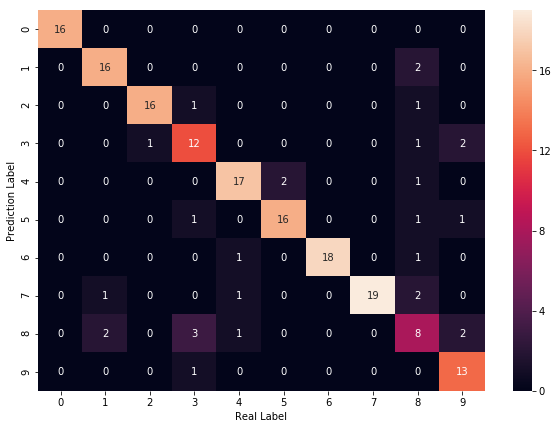

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:15 index:[4 5] real:5
#1 min_error:11 index:[2 3] real:2
#2 min_error:12 index:[1] real:8
#3 min_error:4 index:[0] real:0
#4 min_error:7 index:[1] real:1
#5 min_error:4 index:[7] real:7
#6 min_error:5 index:[6] real:6
#7 min_error:5 index:[3] real:3
#8 min_error:3 index:[2] real:2
#9 min_error:8 index:[1] real:1
#10 min_error:13 index:[4 7] real:7
#11 min_error:11 index:[7] real:4
#12 min_error:8 index:[6] real:6
#13 min_error:10 index:[3] real:3
#14 min_error:7 index:[1] real:1
#15 min_error:12 index:[3] real:3
#16 min_error:11 index:[8] real:9
#17 min_error:6 index:[1] real:1
#18 min_error:10 index:[7] real:7
#19 min_error:2 index:[6] real:6
#20 min_error:11 index:[8] real:8
#21 min_error:6 index:[4] real:4
#22 min_error:6 index:[3] real:3
#23 min_error:10 index:[1] real:1
#24 min_error:4 index:[4] real:4
#25 min_error:2 index:[0] real:0
#26 min_error:10 index:[5] real:5
#27 min_error:6 index:[3] real:3
#28 min_error:11 index:[6] real:6
#29 min_error:9 index:[3] real:9
#

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
np.mean(winner_fitness)

0.8270322270322268

In [17]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.12222222222222222
Accuracy on training set: 0.1111111111111111
Accuracy on training set: 0.23333333333333334
Accuracy on training set: 0.32222222222222224
Accuracy on training set: 0.3888888888888889
Accuracy on training set: 0.3111111111111111
Accuracy on training set: 0.37777777777777777
Accuracy on training set: 0.34444444444444444
Accuracy on training set: 0.4888888888888889
Accuracy on training set: 0.5833333333333334
Accuracy on training set: 0.6
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.6555555555555556
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6777777777777778
Accuracy on training set: 0.6166666666666667
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.7055555555555556
Accuracy on training set: 0.7111111111111111
Accuracy on training set: 0.7277777777777777
Accuracy on training set: 0.7555555555555555
Accuracy on training set: 0.7444444444444445
Accuracy on training

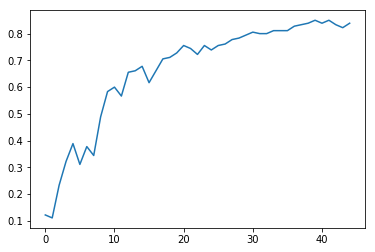

In [18]:
plt.plot(range(45),list_acc)
plt.show()

In [19]:
list_acc

[0.12222222222222222,
 0.1111111111111111,
 0.23333333333333334,
 0.32222222222222224,
 0.3888888888888889,
 0.3111111111111111,
 0.37777777777777777,
 0.34444444444444444,
 0.4888888888888889,
 0.5833333333333334,
 0.6,
 0.5666666666666667,
 0.6555555555555556,
 0.6611111111111111,
 0.6777777777777778,
 0.6166666666666667,
 0.6611111111111111,
 0.7055555555555556,
 0.7111111111111111,
 0.7277777777777777,
 0.7555555555555555,
 0.7444444444444445,
 0.7222222222222222,
 0.7555555555555555,
 0.7388888888888889,
 0.7555555555555555,
 0.7611111111111111,
 0.7777777777777778,
 0.7833333333333333,
 0.7944444444444444,
 0.8055555555555556,
 0.8,
 0.8,
 0.8111111111111111,
 0.8111111111111111,
 0.8111111111111111,
 0.8277777777777777,
 0.8333333333333334,
 0.8388888888888889,
 0.85,
 0.8388888888888889,
 0.85,
 0.8333333333333334,
 0.8222222222222222,
 0.8388888888888889]

In [20]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8559059987631417
Avg Base Learner:0.8270322270322268
